In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math,copy
import random as random
np.random.seed(42)

# Generate 15 data points
num_points = 15

# Generate independent variable
x_training= np.linspace(0, 10, num_points)

# Generate dependent variable with a linear relationship and some noise
# We'll use a slope of 2 and an intercept of 1 for simplicity
slope = 2
intercept = 1
noise = np.random.normal(0, 2, num_points)  # Add noise
y_training= slope * x_training + intercept + noise

In [3]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Number of households
num_households = 10000

# Generate synthetic household income data
household_ids = np.arange(1, num_households + 1)
mean_income = 60000  # Mean household income in the USA
std_dev = 20000  # Standard deviation of household incomes

# Generate normally distributed incomes with mean and standard deviation
incomes = np.random.normal(mean_income, std_dev, num_households).astype(int)

# Ensure all incomes are positive
incomes[incomes < 0] = 0

# Create a DataFrame to store the data
data = {'Household ID': household_ids, 'Income (USD)': incomes}
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('household_income_data.csv', index=False)

# Display the first few rows of the DataFrame
df
# Extract predictor (x_training) and target (y_training) variables
x_training = df[['Income (USD)']]
y_training = df[['Household ID']]

# Display the shape of the training data
print("Shape of x_training:", x_training.shape)
print("Shape of y_training:", y_training.shape)


Shape of x_training: (10000, 1)
Shape of y_training: (10000, 1)


In [18]:
def cost_function(x,y,w,b):
    n=x.shape[0]
    cost=0
    for i in range(n):
        f_wb=w*x[i]+b
        cost+=(f_wb-y[i])**2
    total_cost=(1/(2*n))*cost
    return total_cost

In [19]:
def compute_gradient(x,y,w,b):
    n=x.shape[0]
    
    dj_dw=0
    dj_db=0
    
    for i in range(n):
        f_wb=w*x[i]+b
        dj_dw_i=(f_wb-y[i])*x[i]
        dj_dw+=dj_dw_i
        dj_dw_b=(f_wb-y[i])
        dj_db+=dj_dw_b
    dj_dw*=1/(n)
    dj_db*=1/(n)
    
    return dj_dw,dj_db

In [20]:
def gradient_descent(x,y,w_init,b_init,alpha,iters,cost_function,compute_gradient):
    
    w=copy.deepcopy(w_init)
    cost_hist=[]
    para_hist=[]
    
    w=w_init
    b=b_init
    
    for i in range(iters):
        dj_dw,dj_db=compute_gradient(x,y,w,b)
        w=w-alpha*dj_dw
        b=b-alpha*dj_db
        cost_hist.append(cost_function(x,y,w,b))
        para_hist.append([w,b])
        if i%math.ceil(iters/10)==0:
            print(f"Iteration {i:.3e}: cost:{cost_hist[-1]:.3}, dj_dw:{dj_dw:.3e}, dj_db:{dj_db:.3e}, w:{w:.3e}, b:{b:.3e}")
            
    return w,b,cost_hist,para_hist

In [21]:
# initialize parameters
w_init = 50
b_init = 0
# some gradient descent settings
iterations = int(input("How many iterations: "))
tmp_alpha = float(input("Enter the value of the learning rate-alpha: "))
# run gradient descent
w_final, b_final, cost_hist, para_hist = gradient_descent(x_training ,y_training, w_init, b_init, tmp_alpha, 
                                                    iterations,cost_function, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

How many iterations: 1000
Enter the value of the learning rate-alpha: 0.001
Iteration 0.000e+00: cost:3.7e+04, dj_dw:1.656e+03, dj_db:2.390e+02, w:4.834e+01, b:-2.390e-01
Iteration 1.000e+02: cost:41.8, dj_dw:4.610e+01, dj_db:4.113e+00, w:4.262e+00, b:-6.409e+00
Iteration 2.000e+02: cost:12.9, dj_dw:1.627e+00, dj_db:-2.309e+00, w:3.008e+00, b:-6.333e+00
Iteration 3.000e+02: cost:12.3, dj_dw:3.892e-01, dj_db:-2.422e+00, w:2.938e+00, b:-6.092e+00
Iteration 4.000e+02: cost:11.7, dj_dw:3.458e-01, dj_db:-2.362e+00, w:2.902e+00, b:-5.853e+00
Iteration 5.000e+02: cost:11.2, dj_dw:3.357e-01, dj_db:-2.299e+00, w:2.868e+00, b:-5.620e+00
Iteration 6.000e+02: cost:10.6, dj_dw:3.267e-01, dj_db:-2.238e+00, w:2.835e+00, b:-5.393e+00
Iteration 7.000e+02: cost:10.1, dj_dw:3.180e-01, dj_db:-2.178e+00, w:2.803e+00, b:-5.172e+00
Iteration 8.000e+02: cost:9.67, dj_dw:3.095e-01, dj_db:-2.120e+00, w:2.772e+00, b:-4.958e+00
Iteration 9.000e+02: cost:9.23, dj_dw:3.013e-01, dj_db:-2.064e+00, w:2.741e+00, b:-4.7

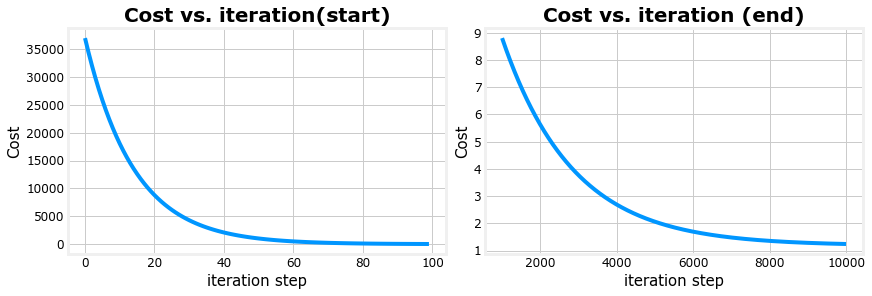

In [6]:
# plt.style.use('ggplot')
plt.style.use('./deeplearning.mplstyle')
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(cost_hist[:100])
ax2.plot(1000 + np.arange(len(cost_hist[1000:])), cost_hist[1000:])
ax1.set_title("Cost vs. iteration(start)",color='black',fontsize=20,fontweight='bold');  ax2.set_title("Cost vs. iteration (end)",color='black',fontsize=20,fontweight='bold')
ax1.set_ylabel('Cost',fontsize=15)            ;  ax2.set_ylabel('Cost',fontsize=15) 
ax1.set_xlabel('iteration step',fontsize=15)  ;  ax2.set_xlabel('iteration step',fontsize=15)
ax1.grid(True)
ax2.grid(True)
plt.show()

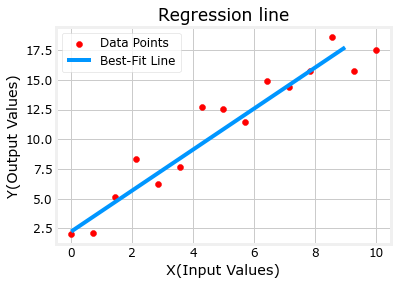

In [7]:
# REGRESSION PLOT
plt.style.use('./deeplearning.mplstyle')
plt.figure()
weight_range=np.linspace(0,7,num=1000)
z=range(0,10)
plt.scatter(x_training,y_training,color='r',label='Data Points')
f=[w_final*x+b_final for x in z]
plt.xlabel('X(Input Values)')
plt.ylabel('Y(Output Values)')
plt.title('Regression line')
plt.grid(True)
plt.plot(z,f,label='Best-Fit Line')
plt.legend()
plt.show()

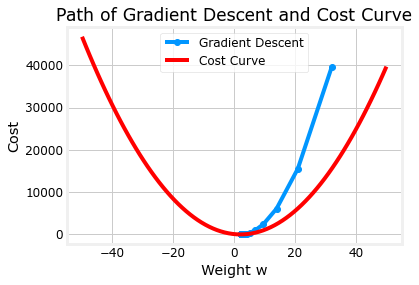

In [8]:
#GRADIENT DESCENT PLOT

plt.style.use('./deeplearning.mplstyle')
# import numpy as np
w=np.linspace(-50,50,80)
b=b_init
w1=w_init
weight_history=[]
cost_history=[]
cost_curve=[]
n=x_training.shape[0]
# for j in range(80):
#         cost=0
#         for i in range(n):
#             f_wb=w[j]*x_training[i]+b
#             cost+=(f_wb-y_training[i])**2
#         total_cost=(1/(2*n))*cost
#         cost_curve.append(total_cost)
for weight_val in w:
        w3= weight_val
        predictions = x_training*w3 + b
        errors = predictions - y_training
        cost = (1 / (2 * len(x_training))) * np.sum(errors**2)
        cost_curve.append(cost)
for iteration in range(iterations):
    predictions = x_training * w1 + b
    errors = predictions - y_training
    
    cost = (1 / (2 * len(x_training))) * np.sum(errors**2)
    cost_history.append(cost)

    weight_chosen_feature = w1 - tmp_alpha * (1 / len(x_training)) * (x_training * errors[:, np.newaxis]).sum()
    b -= tmp_alpha * (1 / len(x_training)) * np.sum(errors)

    weight_history.append(weight_chosen_feature)
    w1 = weight_chosen_feature
plt.figure()
plt.plot(weight_history, cost_history, marker='o', label='Gradient Descent')
plt.plot(w, cost_curve, label='Cost Curve',color='red')
# plt.plot(range(weight_history , label='Cost Curve',color='red')
plt.xlabel('Weight w')
plt.ylabel('Cost')
plt.title('Path of Gradient Descent and Cost Curve')
plt.legend()
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


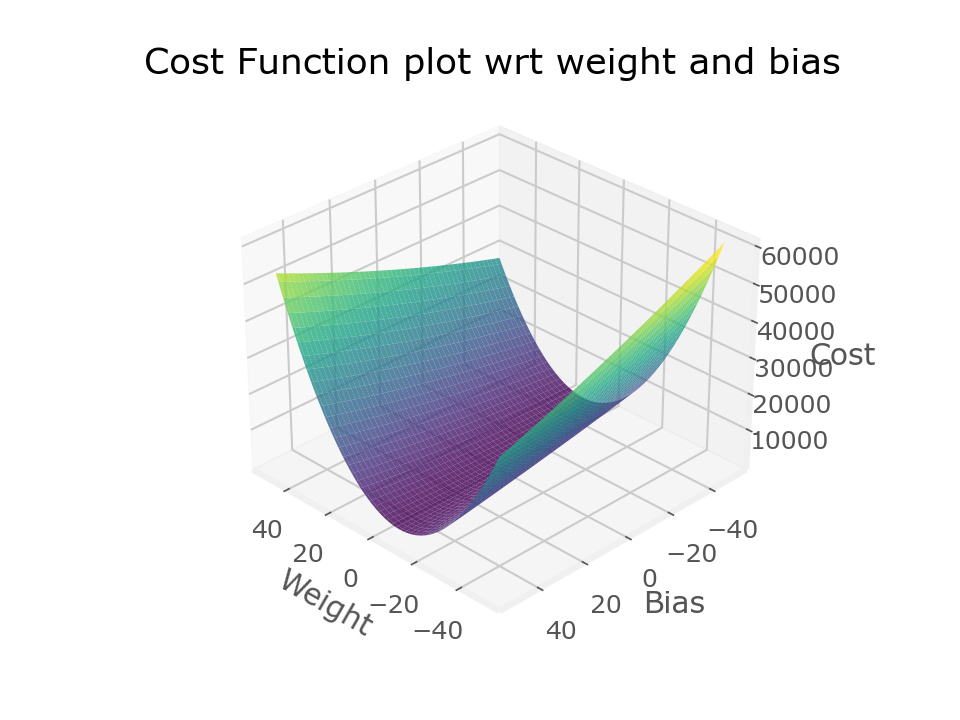

In [172]:
#COST VS PARAMETERS 3-D PLOT

# %matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the range of x and y values
x = np.linspace(-50, 50, 100)
y = np.linspace(-50, 50, 100)

# Create a meshgrid of x and y values
X, Y = np.meshgrid(x, y)

# Define the equation for the paraboloid (z = x^2 + y^2)
# cost=w[j]*x_training[i]+b
Z = cost_function(x_training,y_training,X,Y)

# Create a figure and a 3D axis
fig = plt.figure(figsize=(10, 8))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z, cmap='viridis',alpha=0.8)
ax.mouse_init()
ax.view_init(elev=30, azim=135)  # Adjust elevation and azimuth for the desired viewing angle

# Increase grid density for smoother surface
ax.grid(True)

# Set labels and title
ax.set_xlabel('Weight')
ax.set_ylabel('Bias')
ax.set_zlabel('Cost')
ax.set_title('Cost Function plot wrt weight and bias')
# Show the plot
plt.show()


In [4]:
# Import the necessary library
from sklearn.linear_model import LinearRegression

# Extract predictor (x) and target (y) variables from the DataFrame
x = df[['Income (USD)']]
y = df['Household ID']

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(x, y)

# Print the coefficients
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)



Intercept: 5082.757465210634
Coefficient: [-0.00137175]


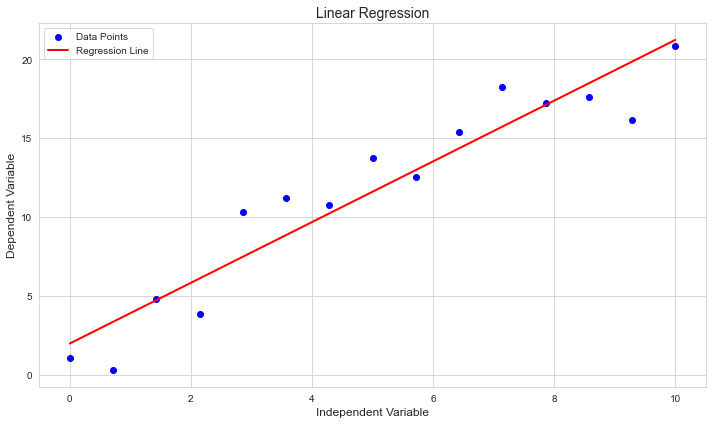

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Set the style to a statistical theme
sns.set_style("whitegrid")

# Generate 15 data points
num_points = 15

# Generate independent variable
x_training = np.linspace(0, 10, num_points)

# Generate dependent variable with a linear relationship and some noise
slope = 2
intercept = 1
noise = np.random.normal(0, 2, num_points)  # Add noise
y_training = slope * x_training + intercept + noise

# Reshape x_training to make it a column vector (required by Scikit-Learn)
x_training = x_training.reshape(-1, 1)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(x_training, y_training)

# Predict y values using the model
predictions = model.predict(x_training)

# Plot the data points and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(x_training, y_training, color='blue', label='Data Points', marker='o')
plt.plot(x_training, predictions, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Independent Variable', fontsize=12)
plt.ylabel('Dependent Variable', fontsize=12)
plt.title('Linear Regression', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()
